In [52]:
from pylab import *
from scipy.ndimage import measurements

In [2]:
%matplotlib inline

rcParams['figure.figsize'] = (12, 8)

In [4]:
from mayavi import mlab
mlab.init_notebook('x3d', 600, 600)

Notebook initialized with x3d backend.


In [16]:
L = 20 # system size
p = linspace(0.0,0.5,51)
perc = 0 # flag to signal if other end is reached
nbetween = 5
nstep = 1
nend = len(p)
nstop = 0
z = rand(L, L, L)  # Random distribution of thresholds

pcluster = zeros((L, L, L)) 
while ((nstop==0) and (nstep<nend)):
    p0 = p[nstep] 
    zz = z < p0 
    [lw,num] = measurements.label(zz) 
    leftside = lw[:,0,0] 
    il = argwhere(leftside>0)
    leftnonzero = leftside[il]  
    #print leftside
    uniqueleftside = unique(leftnonzero) 
    #print uniqueleftside
    cluster = isin(lw, uniqueleftside) #ismember(lw,uniqueleftside)
    pcluster = pcluster + cluster.astype(float) 

    # Check if it has reached the right hand side
    rightside = lw[:,-1,-1] 
    ir = argwhere(rightside>0) 
    rightnonzero = rightside[ir] 
    span = intersect1d(leftnonzero,rightnonzero)
    nstep = nstep + 1 

    if len(span)>0: 
        nstop = 1  # spanning end
        print("Invasion Percolating")

Invasion Percolating


In [22]:
pcluster_masked = np.ma.masked_where(pcluster == 0, pcluster)
mlab.contour3d(pcluster_masked)

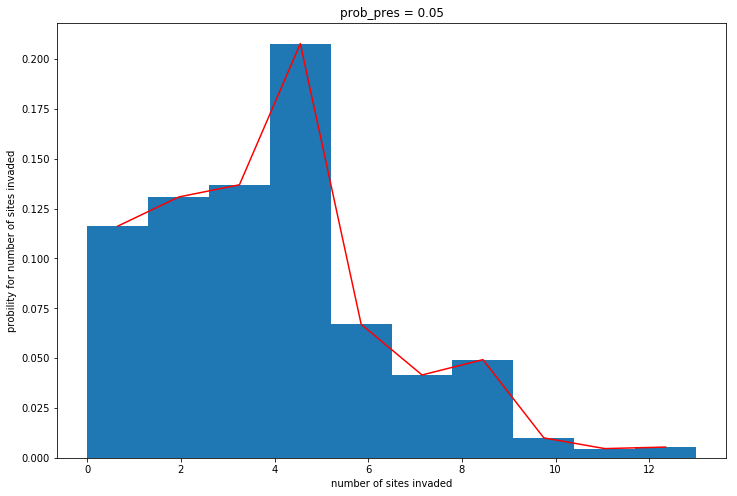

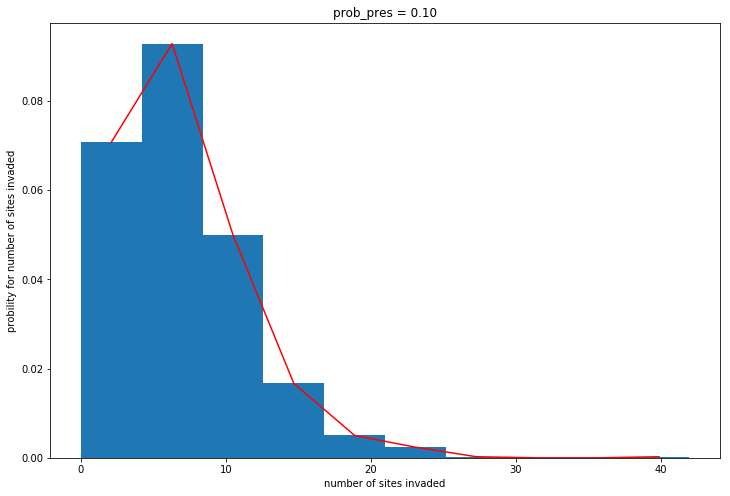

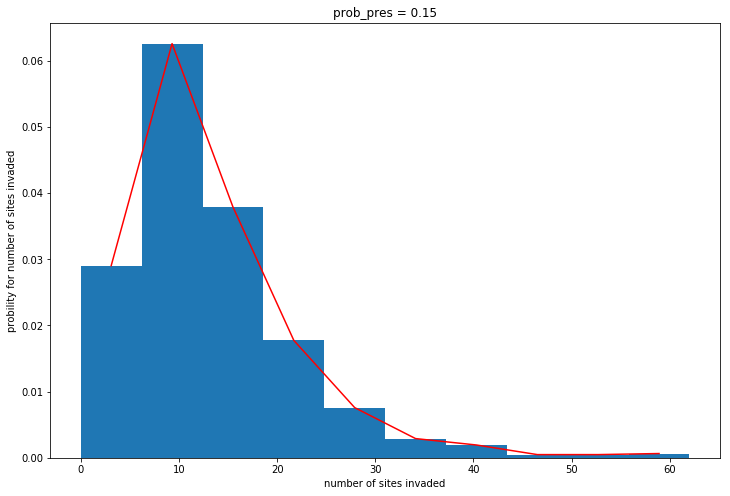

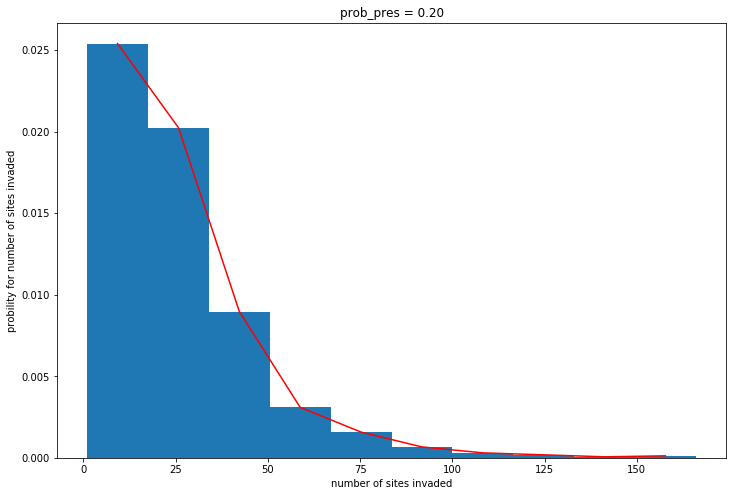

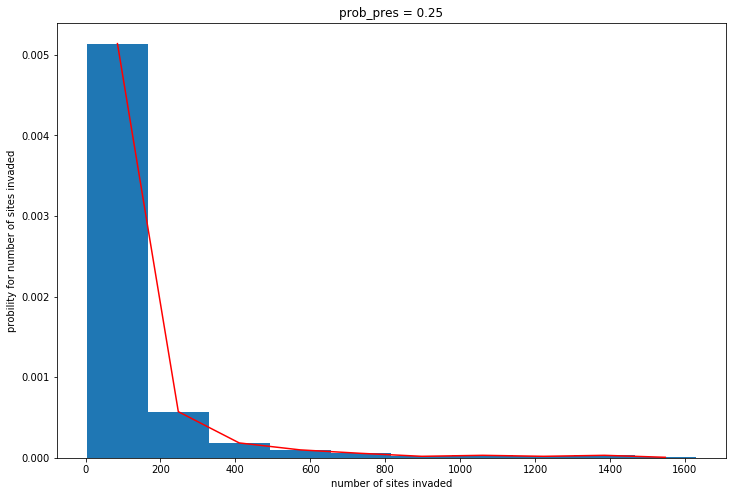

In [82]:
L = 30 # system size
M = 1000

p = linspace(0.0, 0.7, 15)
Ns = zeros((len(p), M))

for mi in range(M):
    perc = 0 # flag to signal if other end is reached
    nbetween = 5
    nstep = 1
    nend = len(p)
    nstop = 0
    z = rand(L, L, L)  # Random distribution of thresholds
    pcluster = zeros((L, L, L)) 

    while ((nstop==0) and (nstep<nend)):
        p0 = p[nstep] 
        zz = z < p0 
        [lw,num] = measurements.label(zz) 
        leftside = lw[:, 0, 0] 
        il = argwhere(leftside>0)
        leftnonzero = leftside[il]  
        #print leftside
        uniqueleftside = unique(leftnonzero) 
        #print uniqueleftside
        cluster = isin(lw, uniqueleftside) #ismember(lw,uniqueleftside)
        pcluster = pcluster + cluster.astype(float)
        Ns[nstep - 1, mi] = len(cluster[cluster == True])
        # Check if it has reached the right hand side
        rightside = lw[:, -1, -1] 
        ir = argwhere(rightside>0) 
        rightnonzero = rightside[ir] 
        span = intersect1d(leftnonzero,rightnonzero)
        nstep = nstep + 1 

        if len(span)>0: 
            nstop = 1  # spanning end            
                       
pis = [1, 2, 3, 4, 5]

for pi in pis:
    p_hist, n_hist = histogram(Ns[pi, :], density=True)
    hist(Ns[pi, :], density=True)
    plot(0.5*(n_hist[1:] + n_hist[:-1]), p_hist, 'r-')
    
    title("prob_pres = {:.2f}".format(p[pi]))
    ylabel("probility for number of sites invaded")
    xlabel("number of sites invaded")
    show()